In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
pd.set_option('display.max_columns', 30)
dados = load_breast_cancer()
x = pd.DataFrame(dados.data, columns= [dados.feature_names])
y = pd.Series(dados.target)

In [2]:
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
X_treino, X_teste,Y_treino,Y_teste = train_test_split(x,y,test_size = 0.3, random_state=9)

modelo = LogisticRegression(C=95,penalty='l2',solver='liblinear')
modelo.fit(x,y)
resultado = modelo.score(X_teste,Y_teste)
print('melhor acuracia',resultado)

melhor acuracia 0.9824561403508771


confusion_matrix

In [3]:
predicao = modelo.predict(X_teste)
predicao

array([1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1])

In [4]:
from sklearn.metrics import confusion_matrix
matriz = confusion_matrix(Y_teste,predicao)
print(matriz)

[[ 60   2]
 [  1 108]]


ROC/AUC

In [5]:
predicoes = modelo.predict_proba(X_teste)
predicoes

array([[2.84190789e-01, 7.15809211e-01],
       [4.53924711e-01, 5.46075289e-01],
       [1.00000000e+00, 7.79183025e-11],
       [3.07101925e-02, 9.69289807e-01],
       [5.98830612e-05, 9.99940117e-01],
       [1.00000000e+00, 1.26441602e-15],
       [1.00000000e+00, 1.41103182e-11],
       [9.99999980e-01, 2.02001795e-08],
       [2.03154982e-03, 9.97968450e-01],
       [9.99999034e-01, 9.65974746e-07],
       [1.00000000e+00, 9.11703512e-11],
       [4.11615328e-04, 9.99588385e-01],
       [2.97076715e-04, 9.99702923e-01],
       [3.88073557e-04, 9.99611926e-01],
       [9.99970389e-01, 2.96113715e-05],
       [1.73750846e-02, 9.82624915e-01],
       [1.42995884e-04, 9.99857004e-01],
       [1.83057343e-02, 9.81694266e-01],
       [8.96236791e-07, 9.99999104e-01],
       [7.59504143e-05, 9.99924050e-01],
       [1.00000000e+00, 5.40943776e-26],
       [4.48122513e-05, 9.99955188e-01],
       [3.48119325e-03, 9.96518807e-01],
       [9.99999870e-01, 1.29769965e-07],
       [7.480286

In [6]:
probs = predicoes[:,1]
from sklearn.metrics import roc_curve
fpr,tpr,theresholds = roc_curve(Y_teste,probs)
print('TPR:',tpr)
print('FPR:',fpr)
print('theresholds:',theresholds)

TPR: [0.         0.00917431 0.97247706 0.97247706 0.99082569 0.99082569
 1.         1.        ]
FPR: [0.         0.         0.         0.01612903 0.01612903 0.08064516
 0.08064516 1.        ]
theresholds: [           inf 9.99999999e-01 7.37061752e-01 7.15809211e-01
 5.69211830e-01 3.62283566e-01 3.46105468e-01 1.77925039e-39]


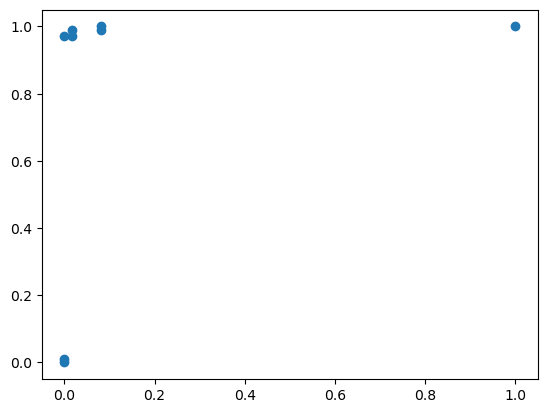

In [7]:
import matplotlib.pyplot as plt
plt.scatter(fpr,tpr)
plt.show()

In [8]:
from sklearn.metrics import roc_auc_score
print(roc_auc_score(Y_teste,probs))

0.9989641905889316


MinMaxScaler
Essa função padroniza os dados entre dois parâmetros estipulados, da seguinte forma:
X_std = (X - Xmin) / (Xmax - Xmin)
X_scaled = X_std * (máx - min) + min

In [10]:
from sklearn.preprocessing import MinMaxScaler
normalizador = MinMaxScaler(feature_range = (0 , 1))
print(normalizador.fit_transform(x))

[[0.52103744 0.0226581  0.54598853 ... 0.91202749 0.59846245 0.41886396]
 [0.64314449 0.27257355 0.61578329 ... 0.63917526 0.23358959 0.22287813]
 [0.60149557 0.3902604  0.59574321 ... 0.83505155 0.40370589 0.21343303]
 ...
 [0.45525108 0.62123774 0.44578813 ... 0.48728522 0.12872068 0.1519087 ]
 [0.64456434 0.66351031 0.66553797 ... 0.91065292 0.49714173 0.45231536]
 [0.03686876 0.50152181 0.02853984 ... 0.         0.25744136 0.10068215]]


StandardScaler
Normaliza os dados a partir da fórmula:
z = (x - u) / s
Onde u é a média e “s” é o desvio padrão (standard deviation).

In [11]:
from sklearn.preprocessing import StandardScaler
normalizador = StandardScaler()
print(normalizador.fit_transform(x))

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


In [ ]:
MaxAbsScaler
Normaliza os dados dividindo cada elemento pelo maior valor do conjunto:
X’ = X/M (onde M é o valor máximo)

In [17]:
from sklearn.preprocessing import MaxAbsScaler
normalizador = MaxAbsScaler()
print(normalizador.fit_transform(x))

[[0.63998577 0.26425662 0.65145889 ... 0.91202749 0.69313046 0.57301205]
 [0.73176805 0.45239308 0.70503979 ... 0.63917526 0.41428141 0.42901205]
 [0.70046247 0.54098778 0.68965517 ... 0.83505155 0.54429045 0.42207229]
 ...
 [0.59053718 0.71486762 0.57453581 ... 0.48728522 0.33413679 0.37686747]
 [0.73283529 0.74669043 0.74323607 ... 0.91065292 0.6156975  0.59759036]
 [0.27605834 0.62474542 0.25421751 ... 0.         0.43250979 0.33922892]]
